# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will build multi-class classification models to predict the type of `"crop"` and identify the single most importance feature for predictive performance.

In [79]:
# All required libraries are imported here for you.
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set the default plot color in Seaborn
base_color = sns.color_palette()[0]

# Load the dataset
crops = pd.read_csv("soil_measures.csv")

# Write your code here

### Exploratory Data Analysis

In [14]:
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


In [15]:
crops.describe()

,N,P,K,ph
count,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,6.469480
std,36.917334,32.985883,50.647931,0.773938
min,0.000000,5.000000,5.000000,3.504752
25%,21.000000,28.000000,20.000000,5.971693
50%,37.000000,51.000000,32.000000,6.425045
75%,84.250000,68.000000,49.000000,6.923643
max,140.000000,145.000000,205.000000,9.935091


#### Imputation

No null values, so no need to impute any values.

#### Review Distribution of Classes

In [16]:
crops.groupby(['crop'])['crop'].count()

crop
apple          100
banana         100
blackgram      100
chickpea       100
coconut        100
coffee         100
cotton         100
grapes         100
jute           100
kidneybeans    100
lentil         100
maize          100
mango          100
mothbeans      100
mungbean       100
muskmelon      100
orange         100
papaya         100
pigeonpeas     100
pomegranate    100
rice           100
watermelon     100
Name: crop, dtype: int64

Classes are evenly distributed. However, just to be pedantic, here is a potential plot that can be used as well.

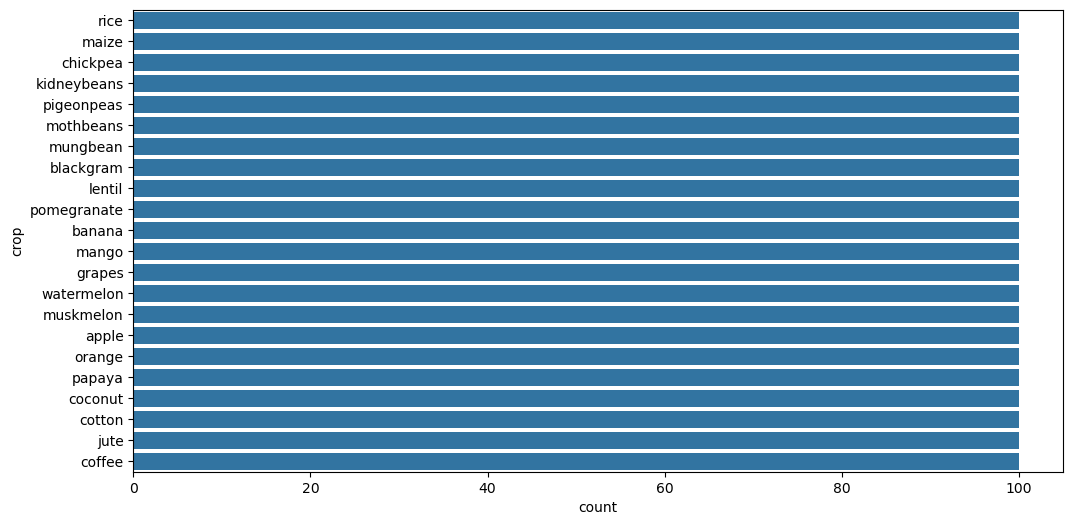

In [17]:
fig, ax = plt.subplots(figsize=(12, 6))
g = sns.countplot(data=crops, y='crop', color=base_color) # use 'y' to make horizontal

#### Review Feature Values by Plotting

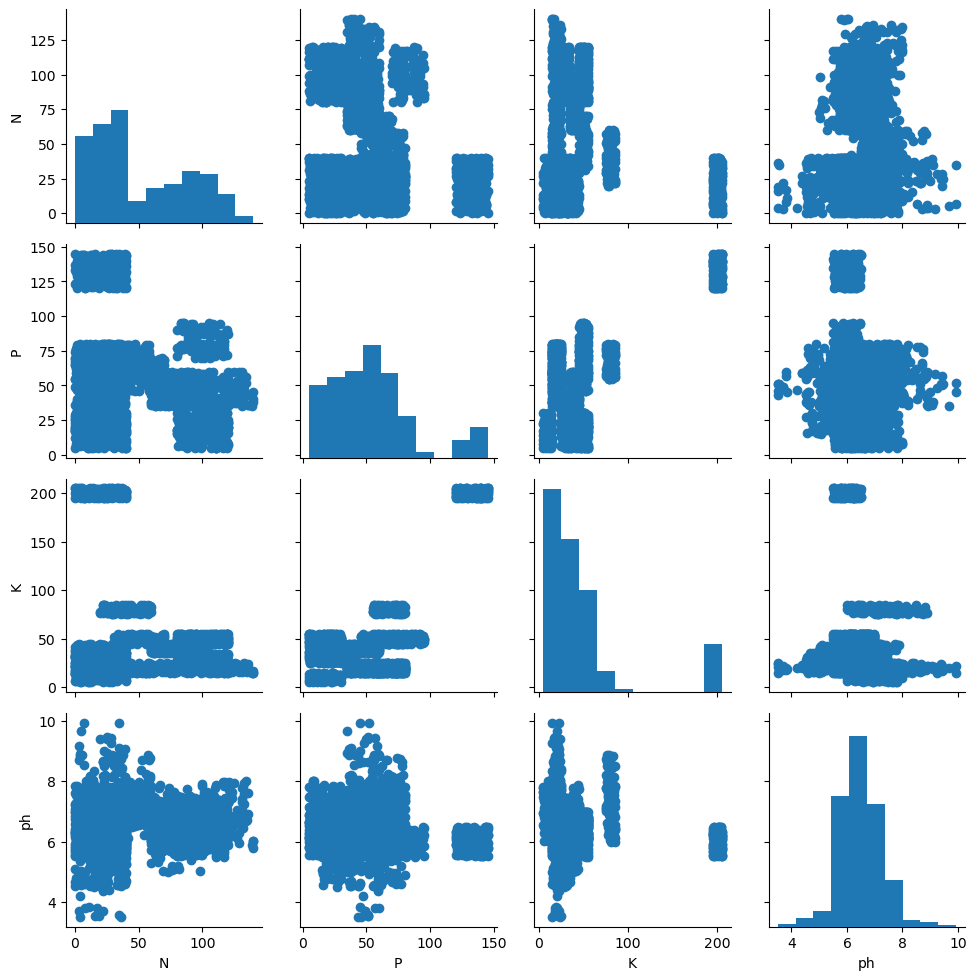

In [30]:
g = sns.PairGrid(crops)
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist);

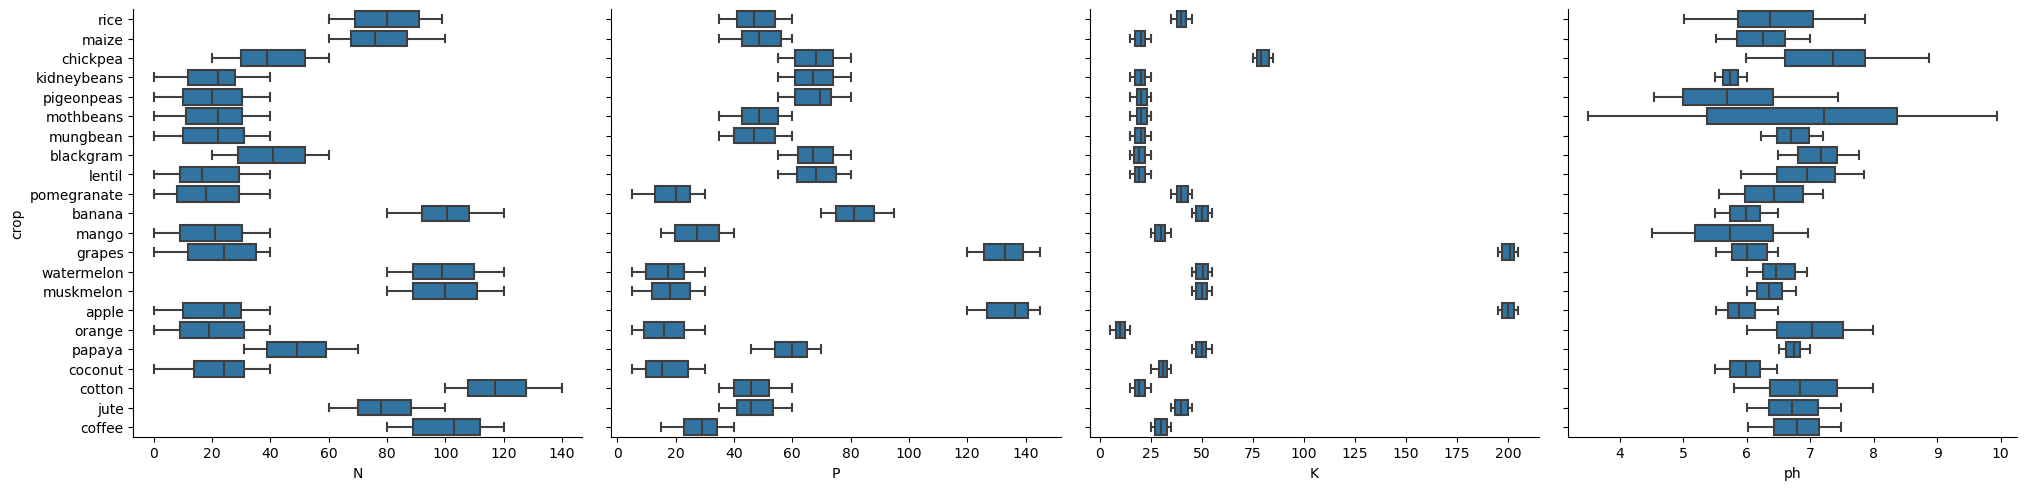

In [19]:
features = ['N', 'P', 'K', 'ph']

g = sns.PairGrid(crops, x_vars=features, y_vars=['crop'], aspect=1, height=5)
g.map(sns.boxplot, color=base_color);

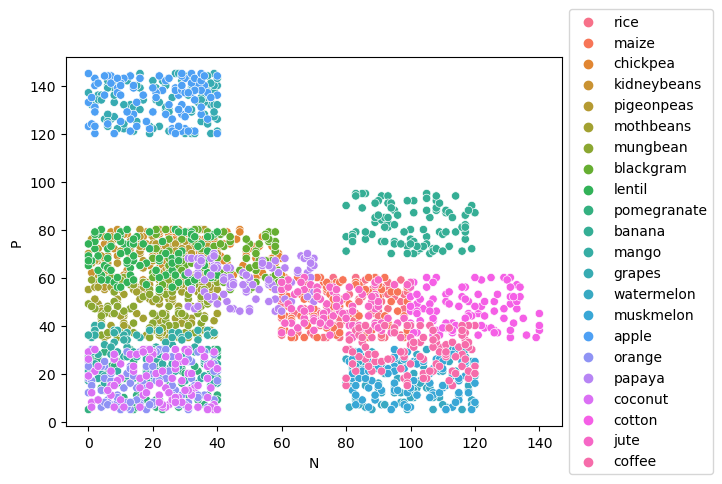

In [27]:
g = sns.scatterplot(data=crops, x='N', y='P', hue='crop')
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1);

#### Split Data

In [81]:
X = crops[features].values
y = crops['crop'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Create Pipeline w/ Feature Engineering

In [83]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(np.mean(X, axis=0), np.std(X, axis=0))
print(np.mean(X_train_scaled, axis=0), np.std(X_train_scaled, axis=0))

[50.55181818 53.36272727 48.14909091  6.46948007] [36.90894258 32.97838509 50.63641835  0.77376177]
[-8.26359183e-17  9.33596634e-17  3.87316442e-17 -1.90205175e-14] [1. 1. 1. 1.]


In [73]:
steps = [('scaler', StandardScaler()), ('logreg', LogisticRegression())]
pipeline = Pipeline(steps)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
params = {'logreg__C': [0.01, 0.1, 1, 10, 100], 'logreg__penalty': ['l2'], 'logreg__solver': ["newton-cg", "saga", "lbfgs"]}

#### Fit Model and Make Predictions - All Features

In [74]:
tuning = GridSearchCV(pipeline, param_grid=params, cv=kf)
tuning.fit(X_train, y_train)
y_pred = tuning.predict(X_test)

print("Tuned Logistic Regression Parameters: {}, Accuracy: {}".format(tuning.best_params_, tuning.score(X_test, y_test)))
print(tuning.best_estimator_.named_steps['logreg'].coef_.mean(axis=0))

c:\Users\ryanj\miniconda3\envs\ds-learning\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ryanj\miniconda3\envs\ds-learning\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ryanj\miniconda3\envs\ds-learning\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ryanj\miniconda3\envs\ds-learning\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ryanj\miniconda3\envs\ds-learning\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ryanj\minic

#### Create models for individual features

In [85]:
tuning = GridSearchCV(pipeline, param_grid=params, cv=kf)

best_feature = ''
best_accuracy = 0
for feature in features:
    X = crops[feature].values.reshape(-1, 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    tuning.fit(X_train, y_train)
    y_pred = tuning.predict(X_test)

    accuracy = tuning.score(X_test, y_test)
    print("Tuned Logistic Regression Parameters for {}: {}, Accuracy: {}".format(feature, tuning.best_params_, accuracy))
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_feature = feature

best_predictive_feature = {best_feature: best_accuracy}
print(best_predictive_feature)

c:\Users\ryanj\miniconda3\envs\ds-learning\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ryanj\miniconda3\envs\ds-learning\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ryanj\miniconda3\envs\ds-learning\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ryanj\miniconda3\envs\ds-learning\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ryanj\miniconda3\envs\ds-learning\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Tuned Logistic Regression Parameters for N: {'logreg__C': 0.1, 'logreg__penalty': 'l2', 'logreg__solver': 'newton-cg'}, Accuracy: 0.1340909090909091


c:\Users\ryanj\miniconda3\envs\ds-learning\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ryanj\miniconda3\envs\ds-learning\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ryanj\miniconda3\envs\ds-learning\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ryanj\miniconda3\envs\ds-learning\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ryanj\miniconda3\envs\ds-learning\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ryanj\minic

Tuned Logistic Regression Parameters for P: {'logreg__C': 100, 'logreg__penalty': 'l2', 'logreg__solver': 'saga'}, Accuracy: 0.18181818181818182


c:\Users\ryanj\miniconda3\envs\ds-learning\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ryanj\miniconda3\envs\ds-learning\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ryanj\miniconda3\envs\ds-learning\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ryanj\miniconda3\envs\ds-learning\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ryanj\miniconda3\envs\ds-learning\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ryanj\minic

Tuned Logistic Regression Parameters for K: {'logreg__C': 100, 'logreg__penalty': 'l2', 'logreg__solver': 'newton-cg'}, Accuracy: 0.24772727272727274
Tuned Logistic Regression Parameters for ph: {'logreg__C': 1, 'logreg__penalty': 'l2', 'logreg__solver': 'saga'}, Accuracy: 0.09772727272727273
{'K': 0.24772727272727274}
